Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная ```species```. При этом записывайте его скор (```DecisionTreeClassifier.score()```) на тренировочных данных, и аккуратность предсказаний (```accuracy_score```) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте ```random seed``` прямо перед созданием дерева или укажите его в параметрах дерева (```random_state=rs```)

```
np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)
```

или

```
my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)
```

In [48]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [50]:
from IPython.display import HTML
style = "<style>svg{width:79% !important; height:70% !important;}</style>"
HTML(style)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [52]:
rs = np.random.seed(0)

In [53]:
iris_data = pd.read_csv(r"https://stepik.org/media/attachments/course/4852/train_iris.csv")

In [71]:
iris_data

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [54]:
X_train = iris_data.drop(['Unnamed: 0', 'species'], axis=1)

In [55]:
X_train

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5
...,...,...,...,...
95,6.5,3.0,5.2,2.0
96,6.7,3.3,5.7,2.1
97,6.3,2.7,4.9,1.8
98,6.3,2.5,5.0,1.9


In [56]:
y_train = iris_data.species

In [57]:
y_train

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

In [58]:
iris_test = pd.read_csv(r"https://stepik.org/media/attachments/course/4852/test_iris.csv") 

In [59]:
iris_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [60]:
X_test = iris_test.drop(['Unnamed: 0', 'species'], axis=1)

In [61]:
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [62]:
y_test = iris_test.species

In [63]:
y_test.head()

0    2
1    1
2    2
3    1
4    0
Name: species, dtype: int64

In [64]:
max_depth_values = range(1, 100)

In [65]:
scores_data = pd.DataFrame()

In [66]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    accuracy_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'accuracy_score':[accuracy_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [67]:
scores_data.head()

,max_depth,train_score,accuracy_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.92,0.96


In [68]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'accuracy_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [69]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
292,95,cross_val_score,0.96
293,96,cross_val_score,0.96
294,97,cross_val_score,0.96
295,98,cross_val_score,0.96


<AxesSubplot:xlabel='max_depth', ylabel='score'>

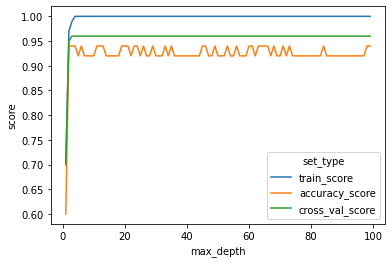

In [70]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)